In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

In [2]:
# Importing pandas
import pandas as pd

# Importing inbuilt datasets 
from sklearn import datasets as data

# Using .load_boston() to load the dataset
boston = data.load_boston()

# Creating a dataframe out of the loaded dataset
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['value'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [96]:
X = df.drop(columns=('value'), axis=1)
y = df['value']
#split the train and test data into ratio 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(404, 13) (404,) (102, 13) (102,)


In [100]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
# Evaluate the model outputs
mse = mean_squared_error(y_test, y_pred_lr)
print("MSE: ", mse)
print("r2", r2_score(y_test, y_pred_lr))

MSE:  28.192485758469516
r2 0.65924665103541


**Model Evaluation:**

* R-squared (Coefficient of Determination): Measure the proportion of variance explained by the model. Higher values indicate a better fit, but be cautious of overfitting.
* Mean Squared Error (MSE) or Root Mean Squared Error (RMSE): Measure the average squared difference between observed and predicted values.
* Adjusted R-squared: Adjusts R-squared for the number of predictors, penalizing excessive complexity.
* Cross-Validation: Perform k-fold cross-validation to assess the model's performance on different subsets of data.


In [102]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred_lr)
print("R-squared:", r2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Adjusted R-squared (if you have the required variables n and p)
n = len(X_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors (features)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r2)

# Perform k-fold cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)  # 5-fold cross-validation
mean_cv_score = np.mean(cv_scores)
print("Cross-Validation Mean R-squared:", mean_cv_score)


R-squared: 0.65924665103541
Mean Squared Error (MSE): 28.192485758469516
Root Mean Squared Error (RMSE): 5.309659665032168
Adjusted R-squared: 0.6089080881201865
Cross-Validation Mean R-squared: 0.7311647628113456


**1- Check for Linearity:**

Plot scatter plots of actual vs. predicted values to visualize the linearity of the relationship between the dependent and independent variables.

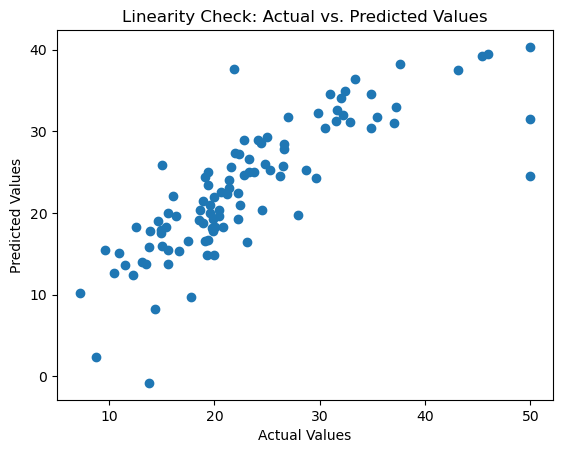

In [103]:
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linearity Check: Actual vs. Predicted Values')
plt.show()

* Linearity check we found the this model has a strong linear Relationship

**2-Check for Homoscedasticity:**

Create residual plots to assess whether the residuals have constant variance.

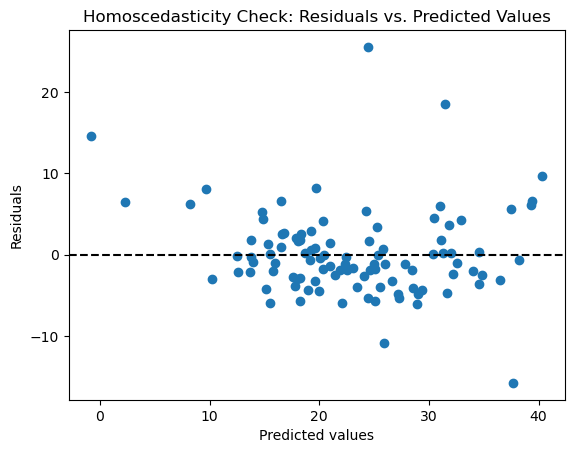

In [108]:
residuals_lr = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals_lr)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.show()

**3- Check for Normality:**
    
Analyze a histogram or a Q-Q plot of the residuals to assess if they follow a normal distribution.

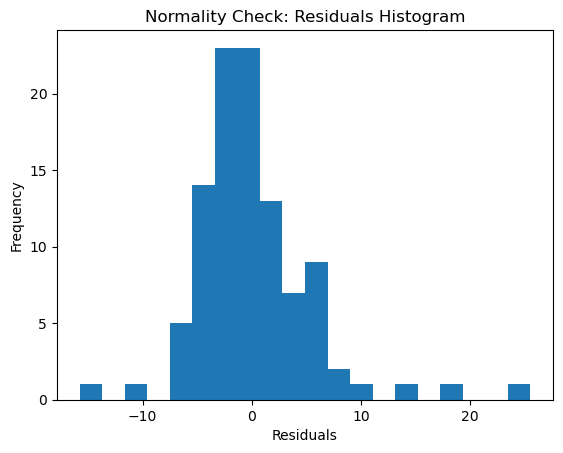

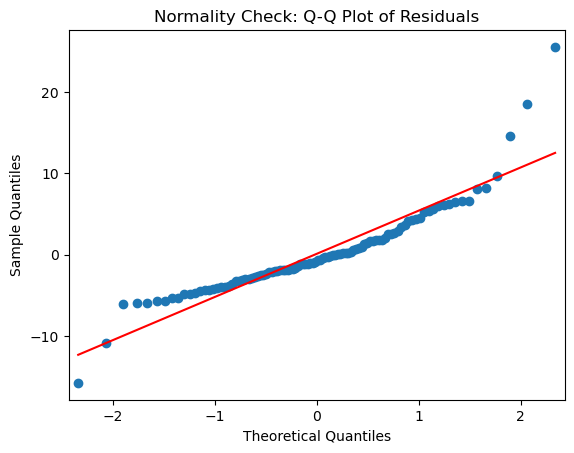

In [128]:
plt.hist(residuals_lr, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Normality Check: Residuals Histogram')
plt.show()

qqplot(residuals_lr, line='s')
plt.title('Normality Check: Q-Q Plot of Residuals')
plt.show()


**4- Check for Multicollinearity:**
    
Calculate variance inflation factors (VIF) to detect high correlation among independent variables.

In [106]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [118]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
collist =  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
vif['features'] = collist
X = df[collist].values
y = df['value'].values
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,features,VIF
10,PTRATIO,85.03
5,RM,77.95
4,NOX,73.89
9,TAX,61.23
6,AGE,21.39
11,B,20.10
8,RAD,15.17
7,DIS,14.70
2,INDUS,14.49
12,LSTAT,11.10


In [127]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=('value'), axis=1)
y = df['value']

#split the train and test data into ratio 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Calculate VIF for each feature
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Identify features with VIF > 10
high_vif_features = vif[vif["VIF"] > 10]["feature"]

# Drop features with high VIF from X_train and X_test
X_train_low_vif = X_train.drop(columns=high_vif_features)
X_test_low_vif = X_test.drop(columns=high_vif_features)
# Create and fit the LinearRegression model with low VIF features
lr_low_vif = LinearRegression()
lr_low_vif.fit(X_train_low_vif, y_train)

# Predict using the model with low VIF features
y_pred_low_vif = lr_low_vif.predict(X_test_low_vif)

# Evaluate the model outputs
mse_low_vif = mean_squared_error(y_test, y_pred_low_vif)
print("MSE (Low VIF): ", mse_low_vif)
print("r2 (Low VIF):", r2_score(y_test, y_pred_low_vif))
X_train_low_vif

(404, 13) (404,) (102, 13) (102,)
MSE (Low VIF):  57.47966724645974
r2 (Low VIF): 0.30526207304308683


,CRIM,ZN,CHAS
203,0.03510,95.0,0.0
441,9.72418,0.0,0.0
172,0.13914,0.0,0.0
95,0.12204,0.0,0.0
54,0.01360,75.0,0.0
...,...,...,...
98,0.08187,0.0,0.0
476,4.87141,0.0,0.0
322,0.35114,0.0,0.0
382,9.18702,0.0,0.0


### Here's how you can implement Forward Selection using scikit-learn's LinearRegression:


In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize an empty set to store selected features
selected_features = set()

# Initialize an empty DataFrame to store results
results = pd.DataFrame(columns=['Features', 'MSE', 'R-squared'])

# Create and fit a LinearRegression model
lr = LinearRegression()

# Iterate over each feature to select
for feature in X_train.columns:
    # Fit the model with the currently selected features and the new feature
    lr.fit(X_train[list(selected_features) + [feature]], y_train)
    
    # Predict on the test set
    y_pred = lr.predict(X_test[list(selected_features) + [feature]])
    
    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to DataFrame
    results = results.append({'Features': list(selected_features) + [feature], 'MSE': mse, 'R-squared': r2}, ignore_index=True)

# Choose the feature combination that results in the lowest MSE
best_features = results.loc[results['MSE'].idxmin()]['Features']

# Print the final selected features and their results
final_mse = results.loc[results['MSE'].idxmin()]['MSE']
final_r2 = results.loc[results['MSE'].idxmin()]['R-squared']
print("Final Selected Features:", best_features)
print("Final MSE:", final_mse)
print("Final R-squared:", final_r2)

Final Selected Features: ['LSTAT']
Final MSE: 46.33630536002592
Final R-squared: 0.43095672846187616


**Recursive Feature Elimination (RFE):**

RFE is an iterative technique that starts with all features and removes the least important one at each step. It uses model performance (e.g., cross-validated R-squared) to determine feature importance.

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize a LinearRegression model
lr = LinearRegression()

# Initialize RFE with cross-validated R-squared as the scoring metric
num_features_to_select = 13  # You can adjust this based on your preference
rfe = RFE(estimator=lr, n_features_to_select=num_features_to_select)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print("Selected Features:", selected_features)

# Train a linear regression model with the selected features
lr_selected = LinearRegression()
lr_selected.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred = lr_selected.predict(X_test[selected_features])

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("MSE:", mse)
print("R-squared:", r2)

# Evaluate the model with cross-validated R-squared
cv_scores = cross_val_score(lr_selected, X_train[selected_features], y_train, cv=5)  # 5-fold cross-validation
mean_cv_score = cv_scores.mean()

# Print the mean cross-validated R-squared
print("Cross-Validation Mean R-squared:", mean_cv_score)


Selected Features: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
MSE: 33.44897999767649
R-squared: 0.5892223849182514
Cross-Validation Mean R-squared: 0.7486772007604274


In [148]:
from scipy import stats

# Perform a t-test
null_hypothesis_value = 0.5  # Value to compare against
t_statistic, p_value = stats.ttest_1samp(cv_scores, null_hypothesis_value)

# Print the t-statistic and p-value
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Compare p-value to significance level (e.g., 0.05) to make a decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean R-squared is significantly different from", null_hypothesis_value)
else:
    print("Fail to reject the null hypothesis: The mean R-squared is not significantly different from", null_hypothesis_value)


T-statistic: 10.221570444467456
P-value: 0.0005162563027190105
Reject the null hypothesis: The mean R-squared is significantly different from 0.5


In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Initialize the trained LinearRegression model
lr_final = LinearRegression()

# Calculate cross-validated R-squared scores
cv_scores = cross_val_score(lr_final, X_train[selected_features], y_train, cv=10)  # 5-fold cross-validation

# Print the R-squared scores for each fold
for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: R-squared = {score:.4}")

# Calculate the mean and standard deviation of the R-squared scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the mean and standard deviation
print("Mean Cross-Validated R-squared:", mean_cv_score)
print("Standard Deviation of Cross-Validated R-squared:", std_cv_score)


Fold 1: R-squared = 0.8279
Fold 2: R-squared = 0.6886
Fold 3: R-squared = 0.7764
Fold 4: R-squared = 0.5589
Fold 5: R-squared = 0.7623
Fold 6: R-squared = 0.7743
Fold 7: R-squared = 0.5126
Fold 8: R-squared = 0.7717
Fold 9: R-squared = 0.8314
Fold 10: R-squared = 0.8059
Mean Cross-Validated R-squared: 0.7310126345738179
Standard Deviation of Cross-Validated R-squared: 0.10523658764088618


Here are some widely used feature selection techniques that can help you identify the most relevant features for your linear regression model:

1. **Recursive Feature Elimination (RFE)**: RFE is an iterative technique that starts with all features and removes the least important one at each step. It uses model performance (e.g., cross-validated R-squared) to determine feature importance.

2. **Forward Selection**: As mentioned earlier, this technique starts with an empty set of features and adds one feature at a time based on its impact on model performance.

3. **Backward Elimination**: Similar to Forward Selection, Backward Elimination starts with all features and removes one feature at a time based on its p-value or another statistical criterion.

4. **LASSO Regression**: LASSO (Least Absolute Shrinkage and Selection Operator) adds a penalty term to the linear regression objective function, encouraging the model to reduce the coefficients of less important features to zero. This effectively performs feature selection.

5. **Ridge Regression**: Ridge Regression also adds a penalty term, but it tends to shrink coefficients towards zero without setting them exactly to zero. This can help mitigate the impact of multicollinearity and indirectly perform feature selection.

6. **Elastic Net**: Elastic Net is a combination of LASSO and Ridge Regression, providing a balance between their strengths. It can effectively select features and handle multicollinearity.

7. **Feature Importance from Tree-Based Models**: Tree-based models like Decision Trees and Random Forests provide feature importance scores. You can rank features based on their importance and select the top ones.

8. **Univariate Feature Selection**: This technique evaluates each feature individually using statistical tests like ANOVA, chi-squared, or mutual information. Features with the highest test scores are selected.

9. **Principal Component Analysis (PCA)**: PCA is a dimensionality reduction technique that can transform your features into a new set of uncorrelated variables (principal components). These components can be used as features.

10. **Mutual Information**: Mutual Information measures the dependence between two variables. It can be used for feature selection by ranking features based on their information gain.

11. **Sequential Feature Selection (SFS)**: SFS is a search algorithm that explores different combinations of features and evaluates their impact on model performance. It selects the best subset of features.

12. **Stability Selection**: This technique combines subsampling and selection algorithms to identify stable features that are consistently selected across multiple samples.

The choice of feature selection technique depends on your data, problem domain, and specific goals. It's often a good idea to try multiple techniques and compare their results. Keep in mind that feature selection is not a one-size-fits-all process, and experimentation is key to finding the best approach for your particular scenario.

**2. Forward Selection**: 
    
As mentioned earlier, this technique starts with an empty set of features and adds one feature at a time based on its impact on model performance.


In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import statsmodels.api as sm

# Load your dataset (replace with your data loading process)
# data = ...

# # Split the data into features (X) and target (y)
# X = data.drop(columns=['target'])
# y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize an empty set to store selected features
selected_features = []

# Initialize a LinearRegression model
lr = LinearRegression()

# Define a function to evaluate model performance
def evaluate_model(X_train, y_train, X_test, y_test):
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Forward Selection
num_features = X.shape[1]
best_mse = float('inf')  # Initialize with a large value
best_r2 = 0.0

for _ in range(num_features):
    best_feature = None
    
    for feature in X.columns:
        if feature not in selected_features:
            mse, r2 = evaluate_model(X_train[selected_features + [feature]], y_train, X_test[selected_features + [feature]], y_test)
            
            if mse < best_mse:
                best_mse = mse
                best_r2 = r2
                best_feature = feature
                
    if best_feature is not None:
        selected_features.append(best_feature)
        print(f"Selected Feature: {best_feature}, MSE: {best_mse:.4f}, R-squared: {best_r2:.4f}")

# Train the final model with the selected features
lr_final = LinearRegression()
lr_final.fit(X_train[selected_features], y_train)

# Perform hypothesis testing on individual coefficients (t-tests)
for feature in selected_features:
    X_selected = X_train[selected_features].copy()
    X_selected = X_selected.drop(columns=[feature])
    X_selected_with_constant = sm.add_constant(X_selected)
    
    model = sm.OLS(y_train, X_selected_with_constant).fit()
    t_statistic = model.tvalues[feature]
    p_value = model.pvalues[feature]
    
    print(f"\nFeature: {feature}")
    print(f"T-Statistic: {t_statistic:.4f}")
    print(f"P-Value: {p_value:.4f}")
    print("Significance Level (alpha): 0.05")
    if p_value < 0.05:
        print("Hypothesis test: Reject null hypothesis (feature is significant)")
    else:
        print("Hypothesis test: Fail to reject null hypothesis (feature is not significant)")
    
# Predict on the test set
y_pred_final = lr_final.predict(X_test[selected_features])

# Calculate MSE and R-squared for the final model
final_mse = mean_squared_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

# Print the results for the final model
print("\nFinal Selected Features:", selected_features)
print("Final Model MSE:", final_mse)
print("Final Model R-squared:", final_r2)


Selected Feature: LSTAT, MSE: 46.3363, R-squared: 0.4310
Selected Feature: RM, MSE: 37.3831, R-squared: 0.5409
Selected Feature: DIS, MSE: 35.6678, R-squared: 0.5620
Selected Feature: B, MSE: 33.6296, R-squared: 0.5870
Selected Feature: CHAS, MSE: 32.5519, R-squared: 0.6002
Selected Feature: NOX, MSE: 32.2894, R-squared: 0.6035
Selected Feature: ZN, MSE: 31.8530, R-squared: 0.6088
Selected Feature: AGE, MSE: 31.7975, R-squared: 0.6095


KeyError: 'LSTAT'

**3.Backward Elimination**: Similar to Forward Selection, Backward Elimination starts with all features and removes one feature at a time based on its p-value or another statistical criterion.

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load your dataset (replace with your data loading process)
# data = ...

# # Split the data into features (X) and target (y)
# X = data.drop(columns=['target'])
# y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize a LinearRegression model
lr = LinearRegression()

# Define a function to evaluate model performance
def evaluate_model(X_train, y_train, X_test, y_test):
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Backward Elimination
num_features = X.shape[1]
selected_features = list(X.columns)  # Start with all features

while len(selected_features) > 0:
    X_selected = X_train[selected_features]
    lr.fit(X_selected, y_train)
    
    # Calculate p-values based on coefficients
    p_values = np.abs(lr.coef_)
    
    # Find the feature with the lowest coefficient (highest p-value)
    max_p_value_index = np.argmax(p_values)
    if lr.coef_[max_p_value_index] > 0.05:
        removed_feature = selected_features[max_p_value_index]
        selected_features.remove(removed_feature)
        print(f"Removed Feature: {removed_feature}, Coefficient: {lr.coef_[max_p_value_index]:.4f}")
    else:
        break

# Train the final model with the selected features
lr_final = LinearRegression()
lr_final.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred_final = lr_final.predict(X_test[selected_features])

# Calculate MSE and R-squared for the final model
final_mse = mean_squared_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

# Print the results for the final model
print("\nFinal Selected Features:", selected_features)
print("Final Model MSE:", final_mse)
print("Final Model R-squared:", final_r2)



Final Selected Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Final Model MSE: 33.44897999767649
Final Model R-squared: 0.5892223849182514


**4. LASSO Regression**: LASSO (Least Absolute Shrinkage and Selection Operator) adds a penalty term to the linear regression objective function, encouraging the model to reduce the coefficients of less important features to zero. This effectively performs feature selection.


In [167]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load your dataset (replace with your data loading process)
# data = ...

# # Split the data into features (X) and target (y)
# X = data.drop(columns=['target'])
# y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize a Lasso model
alpha = 0.1  # You can adjust this regularization parameter
lasso = Lasso(alpha=alpha)

# Fit the Lasso model on the training data
lasso.fit(X_train, y_train)

# Get the coefficients (effect sizes) of the features
coefficients = lasso.coef_

# Get the selected features (those with non-zero coefficients)
selected_features = X.columns[coefficients != 0]

# Train the final Lasso model with the selected features
lasso_final = Lasso(alpha=alpha)
lasso_final.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred_final = lasso_final.predict(X_test[selected_features])

# Calculate MSE and R-squared for the final Lasso model
final_mse = mean_squared_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

# Print the results for the final Lasso model
print("Selected Features:", selected_features)
print("Final Model MSE:", final_mse)
print("Final Model R-squared:", final_r2)


Selected Features: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Final Model MSE: 36.07485259555721
Final Model R-squared: 0.5569747742783786



7. **Feature Importance from Tree-Based Models**: Tree-based models like Decision Trees and Random Forests provide feature importance scores. You can rank features based on their importance and select the top ones.


In [174]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace with your data loading process)
# data = ...

# Split the data into features (X) and target (y)
# X = data.drop(columns=['target'])
# y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize a Random Forest Regressor
n_estimators = 100  # You can adjust the number of estimators
random_forest = RandomForestRegressor(n_estimators=n_estimators, random_state=0)

# Fit the Random Forest model on the training data
random_forest.fit(X_train, y_train)

# Get feature importances
feature_importances = random_forest.feature_importances_

# Sort features based on importance
sorted_indices = feature_importances.argsort()[::-1]

# Select the top features
num_top_features = 5  # You can adjust the number of top features
selected_features = X.columns[sorted_indices[:num_top_features]]

# Train the final model with the selected features
random_forest_final = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
random_forest_final.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred_final = random_forest_final.predict(X_test[selected_features])

# Calculate MSE and R-squared for the final model
final_mse = mean_squared_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

# Print the results for the final model
print("Selected Features:", selected_features)
print("Final Model MSE:", final_mse)
print("Final Model R-squared:", final_r2)


Selected Features: Index(['RM', 'LSTAT', 'CRIM', 'DIS', 'NOX'], dtype='object')
Final Model MSE: 18.54095474509804
Final Model R-squared: 0.7723036944008739


**8. Univariate Feature Selection**: This technique evaluates each feature individually using statistical tests like ANOVA, chi-squared, or mutual information. Features with the highest test scores are selected.

In [182]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace with your data loading process)
# data = ...

# Split the data into features (X) and target (y)
# X = data.drop(columns=['target'])
# y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform univariate feature selection using f_regression (you can choose a different test)
num_features_to_select = 10  # You can adjust the number of features to select
feature_selector = SelectKBest(score_func=f_regression, k=num_features_to_select)
X_train_selected = feature_selector.fit_transform(X_train, y_train)

# Get the indices of selected features
selected_feature_indices = feature_selector.get_support(indices=True)

# Get the names of selected features
selected_features = X.columns[selected_feature_indices]

# Initialize a Linear Regression model
lr = LinearRegression()

# Train the Linear Regression model on the selected features
lr.fit(X_train_selected, y_train)

# Predict on the test set using the selected features
X_test_selected = feature_selector.transform(X_test)
y_pred = lr.predict(X_test_selected)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the selected features
print("Selected Features:", selected_features)
print("MSE:", mse)
print("R-squared:", r2)


Selected Features: Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT'],
      dtype='object')
MSE: 39.3019904147871
R-squared: 0.5173431927767768



9. **Principal Component Analysis (PCA)**: PCA is a dimensionality reduction technique that can transform your features into a new set of uncorrelated variables (principal components). These components can be used as features.


In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform PCA on the training data
num_components = 10  # You can choose the number of components based on your preference
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)

# Initialize a Linear Regression model
lr_pca = LinearRegression()

# Fit the Linear Regression model on the PCA-transformed training data
lr_pca.fit(X_train_pca, y_train)

# Transform the testing data using PCA
X_test_pca = pca.transform(X_test)

# Predict on the PCA-transformed testing data
y_pred_pca = lr_pca.predict(X_test_pca)

# Calculate MSE and R-squared for PCA-based Linear Regression
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

# Print the results
print("PCA-based Linear Regression - MSE:", mse_pca)
print("PCA-based Linear Regression - R-squared:", r2_pca)

# Perform hypothesis testing on the PCA-based Linear Regression model coefficients
num_components_with_constant = num_components + 1
t_values = np.zeros(num_components_with_constant)
p_values = np.zeros(num_components_with_constant)

for i in range(num_components_with_constant):
    X_train_pca_with_constant = np.column_stack((np.ones(X_train_pca.shape[0]), X_train_pca[:, :i+1]))
    lr_pca.fit(X_train_pca_with_constant, y_train)
    t_values[i] = lr_pca.coef_[-1] / np.sqrt(np.mean(np.square(np.linalg.lstsq(X_train_pca_with_constant, y_train, rcond=None)[1])))
    p_values[i] = 2 * (1 - stats.t.cdf(np.abs(t_values[i]), df=len(X_train_pca_with_constant) - X_train_pca_with_constant.shape[1]))

# Print the t-values and p-values for hypothesis testing
for i in range(num_components_with_constant):
    print(f"Component {i+1}: T-value = {t_values[i]:.4f}, P-value = {p_values[i]:.4f}")


PCA-based Linear Regression - MSE: 41.25505451582168
PCA-based Linear Regression - R-squared: 0.49335815605576183
Component 1: T-value = -0.0000, P-value = 1.0000
Component 2: T-value = -0.0000, P-value = 1.0000
Component 3: T-value = 0.0000, P-value = 1.0000
Component 4: T-value = 0.0000, P-value = 1.0000
Component 5: T-value = -0.0000, P-value = 1.0000
Component 6: T-value = -0.0001, P-value = 1.0000
Component 7: T-value = 0.0000, P-value = 1.0000
Component 8: T-value = -0.0000, P-value = 1.0000
Component 9: T-value = -0.0001, P-value = 0.9999
Component 10: T-value = -0.0001, P-value = 0.9999
Component 11: T-value = -0.0001, P-value = 0.9999



10. **Mutual Information**: Mutual Information measures the dependence between two variables. It can be used for feature selection by ranking features based on their information gain.



In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize a Linear Regression model
lr = LinearRegression()

# Initialize SelectKBest with Mutual Information as the scoring metric
num_features_to_select = 5  # You can adjust this based on your preference
selector = SelectKBest(score_func=mutual_info_regression, k=num_features_to_select)

# Fit SelectKBest on the training data
selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.get_support()]

# Print the selected features
print("Selected Features:", selected_features)

# Train a linear regression model with the selected features
lr_selected = LinearRegression()
lr_selected.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred = lr_selected.predict(X_test[selected_features])

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("MSE:", mse)
print("R-squared:", r2)

# Hypothesis testing for individual coefficients
X_selected_with_constant = np.column_stack([np.ones(X_train[selected_features].shape[0]), X_train[selected_features]])
for idx, feature in enumerate(selected_features):
    model = lr_selected
    t_statistic = model.coef_[idx]
    p_value = stats.t.sf(np.abs(t_statistic), df=len(X_selected_with_constant) - len(selected_features))
    print(f"Feature: {feature}, t-statistic: {t_statistic}, p-value: {p_value}")


Selected Features: Index(['INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT'], dtype='object')
MSE: 42.18912353095963
R-squared: 0.4818871144160234
Feature: INDUS, t-statistic: 0.035208191808438746, p-value: 0.48596566853658785
Feature: NOX, t-statistic: -5.983811391429494, p-value: 2.427314401244215e-09
Feature: RM, t-statistic: 4.369568327734443, p-value: 7.94722907539968e-06
Feature: PTRATIO, t-statistic: -1.1615506002441338, p-value: 0.12305621982699809
Feature: LSTAT, t-statistic: -0.5306131443847842, p-value: 0.2979910401925104


**11 Sequential Feature Selection (SFS)**: SFS is a search algorithm that explores different combinations of features and evaluates their impact on model performance. It selects the best subset of features.

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from scipy import stats

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize a Linear Regression model
lr = LinearRegression()

# Initialize SequentialFeatureSelector
num_features_to_select = 10  # You can adjust this based on your preference
sfs = SequentialFeatureSelector(estimator=lr, k_features=num_features_to_select, forward=True, scoring='neg_mean_squared_error')

# Fit SequentialFeatureSelector on the training data
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = list(sfs.k_feature_idx_)

# Get the selected feature names
selected_features = X_train.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:", selected_features)

# Train a linear regression model with the selected features
lr_selected = LinearRegression()
lr_selected.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred = lr_selected.predict(X_test[selected_features])

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("MSE:", mse)
print("R-squared:", r2)

# Calculate residuals
residuals = y_test - y_pred

# Perform hypothesis test on coefficients
p_values = []
for coef in lr_selected.coef_:
    t_statistic = coef / (np.std(residuals) / np.sqrt(np.sum((X_test[selected_features] - np.mean(X_test[selected_features])) ** 2, axis=0)))
    p_value = stats.t.sf(np.abs(t_statistic), df=len(X_test[selected_features]) - 1) * 2
    p_values.append([round(float(p), 4) for p in p_value])  # Convert to float and round the p-values to 4 decimal places

# Create a DataFrame to store coefficient names, coefficients, and p-values
coef_results = pd.DataFrame({'Feature': selected_features, 'Coefficient': lr_selected.coef_, 'P-Values': p_values})

# Print the results
coef_results


Selected Features: Index(['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')
MSE: 34.241673485721485
R-squared: 0.5794875367843897


,Feature,Coefficient,P-Values
0,CRIM,-0.125436,"[0.0296, 0.0, 0.9796, 0.8747, 0.6346, 0.0575, ..."
1,ZN,0.044793,"[0.4326, 0.0923, 0.9927, 0.9551, 0.8652, 0.494..."
2,NOX,-16.132734,"[0.0, 0.0, 0.0013, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
3,RM,3.747093,"[0.0, 0.0, 0.4451, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
4,DIS,-1.412088,"[0.0, 0.0, 0.7732, 0.0782, 0.0, 0.0, 0.0, 0.0,..."
5,RAD,0.260614,"[0.0, 0.0, 0.9576, 0.7433, 0.3243, 0.0001, 0.0..."
6,TAX,-0.011616,"[0.8385, 0.6604, 0.9981, 0.9884, 0.9649, 0.859..."
7,PTRATIO,-1.071144,"[0.0, 0.0, 0.827, 0.1802, 0.0001, 0.0, 0.0, 0...."
8,B,0.008657,"[0.8793, 0.7433, 0.9986, 0.9913, 0.9738, 0.894..."
9,LSTAT,-0.496052,"[0.0, 0.0, 0.9194, 0.5334, 0.0623, 0.0, 0.0, 0..."


12. **Stability Selection**: This technique combines subsampling and selection algorithms to identify stable features that are consistently selected across multiple samples.


In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize a Linear Regression model
lr = LinearRegression()

# Initialize RFE with cross-validated R-squared as the scoring metric
num_features_to_select = 5  # You can adjust this based on your preference
rfe = RFE(estimator=lr, n_features_to_select=num_features_to_select)

# Fit RFE on subsampled training data
num_subsamples = 10  # Number of subsamples
selected_feature_indices = []
for _ in range(num_subsamples):
    subsample_indices = np.random.choice(X_train.shape[0], size=int(0.8 * X_train.shape[0]), replace=False)
    rfe.fit(X_train.iloc[subsample_indices], y_train[subsample_indices])
    selected_feature_indices.append(np.where(rfe.support_)[0])

# Count the frequency of selected features
feature_counts = np.bincount(np.concatenate(selected_feature_indices))
selected_feature_indices = np.where(feature_counts >= num_subsamples * 0.5)[0]

# Get the selected feature names
selected_features = X_train.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:", selected_features)

# Train a linear regression model with the selected features
lr_selected = LinearRegression()
lr_selected.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred = lr_selected.predict(X_test[selected_features])

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("MSE:", mse)
print("R-squared:", r2)


KeyError: '[137, 225, 10, 46, 374, 97, 162, 102, 241, 331, 293, 330, 45, 320, 326, 15, 300, 233, 205, 188, 155, 96, 303, 253, 247, 386, 1, 229, 352, 344, 367, 113, 372, 206, 224, 76, 153, 342, 340, 319, 391, 219, 107, 371, 108, 400, 60, 54, 171, 299, 213, 75, 387, 65, 329, 230, 154, 90, 254, 175, 246, 21, 56, 173, 37] not in index'

##### Testing a linear model involves assessing its performance, validity, and assumptions. Here's a step-by-step guide on how to test a linear model:

**Data Preparation:**

Ensure your data is clean, properly formatted, and correctly labeled.
Split your data into training and testing sets (or use cross-validation) to evaluate the model's performance on unseen data.

**Model Fitting:**
Choose the appropriate independent variables for your model.
Use a method like Ordinary Least Squares (OLS) to estimate the model's coefficients.

**Assumption Checks:**

* Check for linearity: Examine scatter plots of observed vs. predicted values to ensure a linear relationship.
* Check for homoscedasticity: Create residual plots to assess whether the residuals have constant variance.
* Check for normality: Analyze a histogram or a Q-Q plot of the residuals to assess if they follow a normal distribution.
* Check for multicollinearity: Calculate variance inflation factors (VIF) to detect high correlation among independent variables.

**Model Evaluation:**

* R-squared (Coefficient of Determination): Measure the proportion of variance explained by the model. Higher values indicate a better fit, but be cautious of overfitting.
* Mean Squared Error (MSE) or Root Mean Squared Error (RMSE): Measure the average squared difference between observed and predicted values.
* Adjusted R-squared: Adjusts R-squared for the number of predictors, penalizing excessive complexity.
* Cross-Validation: Perform k-fold cross-validation to assess the model's performance on different subsets of data.

**Residual Analysis:**

Plot residuals vs. predicted values: Check for any patterns or trends in the residuals.
Test for autocorrelation: Use the Durbin-Watson test to detect autocorrelation in the residuals.

**Outlier Detection:**

Identify potential outliers using scatter plots of residuals or leverage plots.
Investigate the impact of outliers on the model's assumptions and results.

**Hypothesis Testing:**

Test the significance of individual coefficients using t-tests or F-tests.
Check whether the overall model is significant using an F-test.

**Robustness Checks:**

Test the model with different specifications or variable combinations to assess its stability and sensitivity.

**Interpretation:**

Interpret the coefficients of the independent variables in the context of the problem domain.

**Model Comparison:**

Compare your linear model to alternative models (e.g., different algorithms or feature sets) to determine which performs better.
Reporting and Conclusion:

Summarize your findings, including the model's strengths, weaknesses, and limitations.
Discuss any actions or insights that can be derived from the model's results.
Remember that testing a linear model is an iterative process. It involves a combination of statistical tests, visualization, and domain knowledge to ensure the model's validity and usefulness. Careful consideration of assumptions, evaluation metrics, and model interpretation is key to building a reliable and effective linear regression model.



In [35]:
#fit a linear Regression model
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     92.92
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          1.18e-110
Time:                        16:04:13   Log-Likelihood:                -1185.1
No. Observations:                 404   AIC:                             2398.
Df Residuals:                     390   BIC:                             2454.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.8352      5.529      5.758      0.0

In [36]:
#Make the prediction
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

In [37]:
# Evaluate the model outputs
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("r2", r2_score(y_test, y_pred))

MSE:  28.19248575846947
r2 0.6592466510354106


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

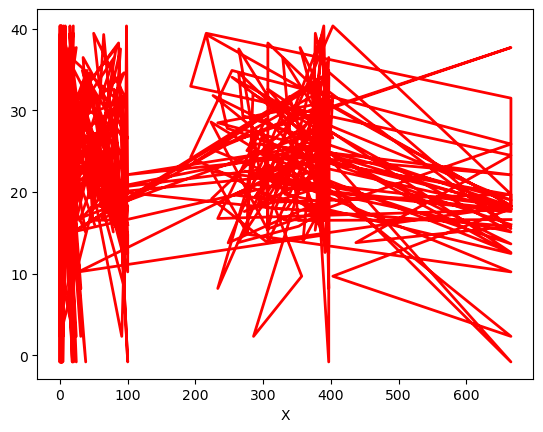

In [41]:
# Plot the data and regression line
#plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylable("y")
plt.title("Linear Regression")
plt.show()